In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5

In [3]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined
data['ZLIM_UPPER'] = 0.6

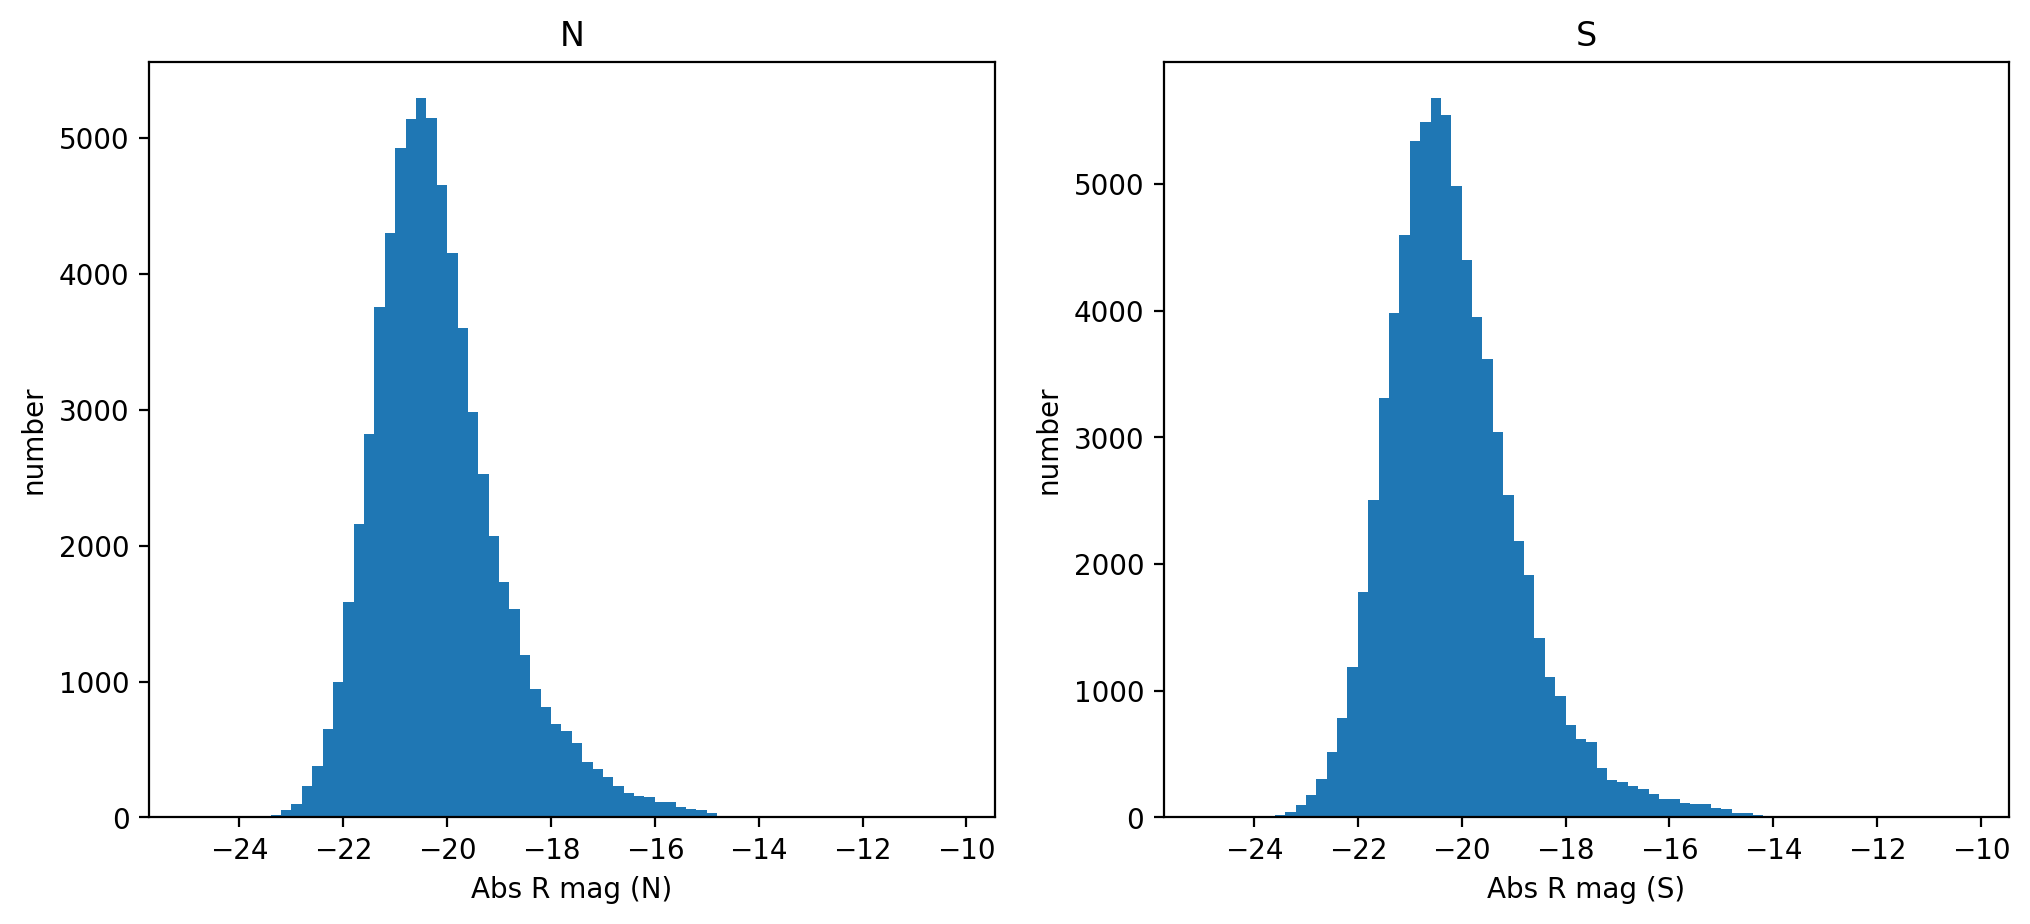

In [4]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-25,-10,0.2)
plt.subplot(121)
plt.title('N')
plt.hist(N['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.title('S')
plt.hist(S['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week8/sv3_bright_abs_rmag_hist')

In [5]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])


/tmp/ipykernel_202139/4066366636.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_202139/4066366636.py:7: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_202139/4066366636.py:12: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])


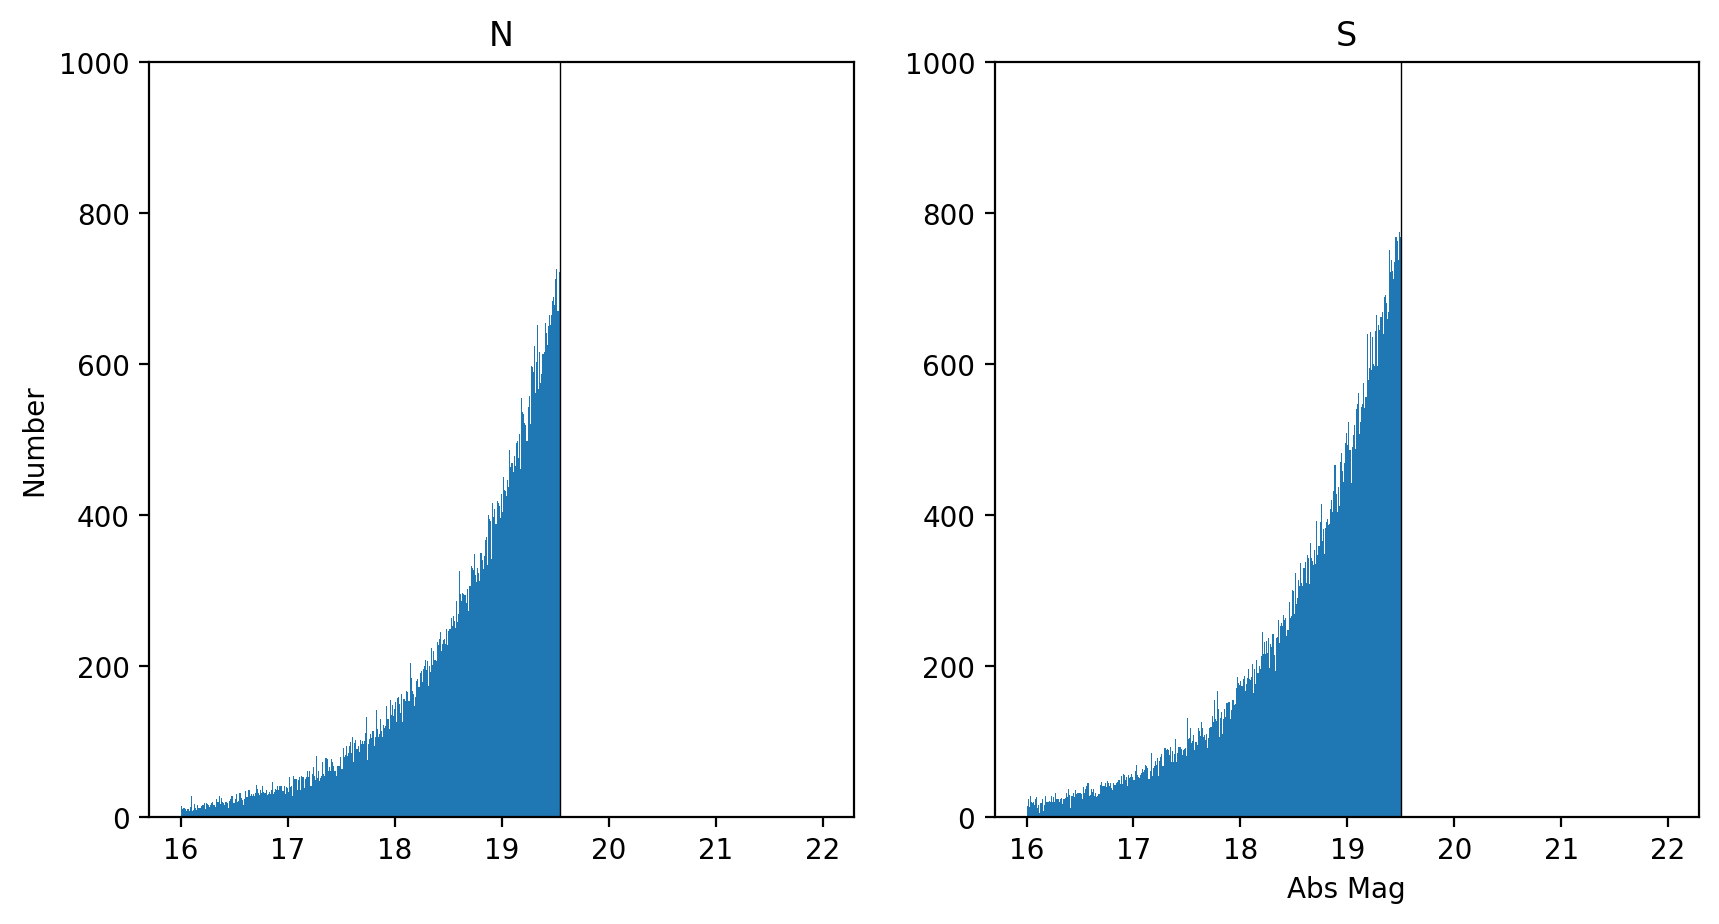

In [6]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.539993,19.539993],[0,1000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,1000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.xlabel('Abs Mag')


plt.show()

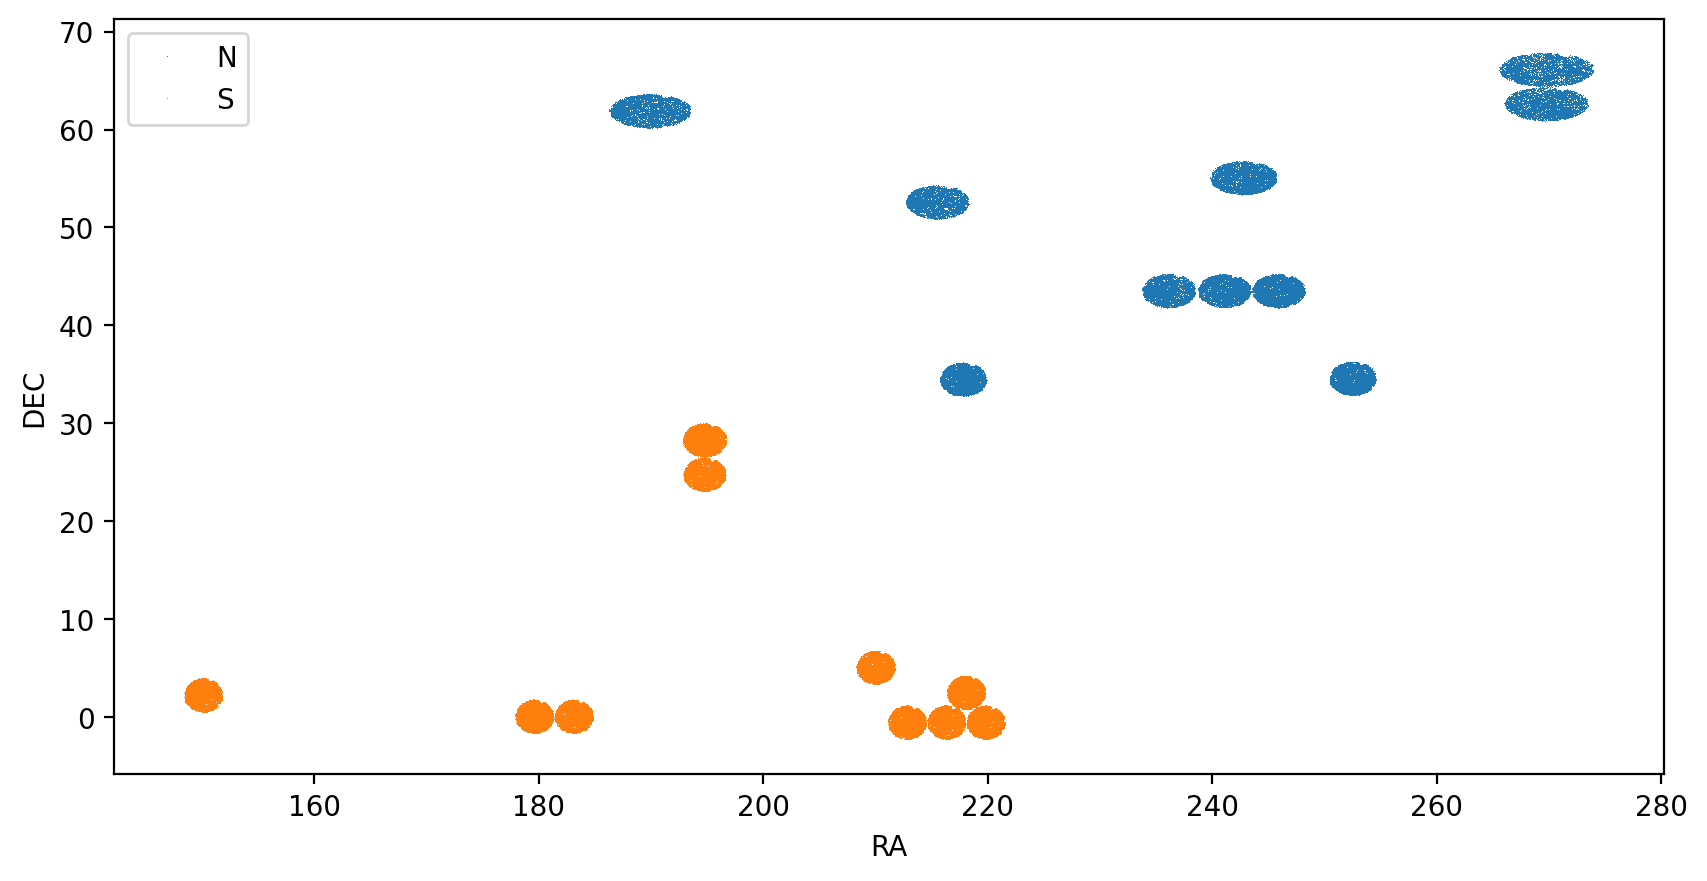

In [7]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(N['RA'], N['DEC'], lw=0, marker=',', label='N')
plt.plot(S['RA'], S['DEC'], lw=0, marker=',', label='S')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()

plt.savefig('../figures/week8/sv3_bright_sky_coverage.png')

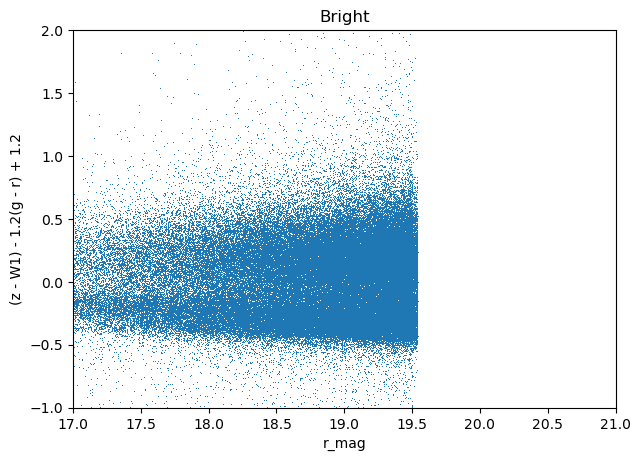

In [45]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
plt.figure(figsize=(7,5), dpi=100)
plt.title('Bright')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.savefig('../figures/week8/sv3_bright_Fig4.png')

#no faint

In [9]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3)
data['DL'] = cosmo.luminosity_distance(np.array(data['Z']))

In [10]:
data['ABSMAG_LIM'] = data['APPLIM'] - 5*np.log10(data['DL'])-25-data['KCORR_R0P1']-data['EQ_ALL_0P1']

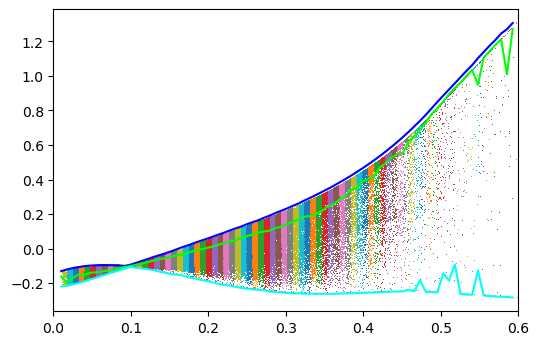

In [37]:
plt.figure(dpi=100)
def find_k(z_range, stat):
    if isinstance(z_range, np.ndarray):
        k = np.empty(len(z_range)-1)
        for i, z in enumerate(z_range):
            if i == len(z_range)-1:
                break
            z_close = np.where(np.logical_and(data['Z'] > (z), data['Z'] < (z_range[i+1])))[0]
            plt.plot(data['Z'][z_close], data['KCORR_R0P1'][z_close], lw=0, marker=',')
            if stat == 'med':
                k[i] = np.median(data['KCORR_R0P1'][z_close])
            elif stat == 'max':
                k[i] = np.amax(data['KCORR_R0P1'][z_close])
            elif stat == 'min':
                k[i] = np.amin(data['KCORR_R0P1'][z_close])
        return k


z_range = np.linspace(0.01,0.6,80)  
M_range = np.arange(-23,-16,0.01)
k_med = find_k(z_range, 'med') 
k_max = find_k(z_range, 'max')
k_min = find_k(z_range, 'min')
plt.plot(z_range[0:-1], k_max, color='blue')
plt.plot(z_range[0:-1], k_med, color='lime')
plt.plot(z_range[0:-1], k_min, color='aqua')

plt.xlim(0,0.6)
plt.show()

In [38]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [39]:
z1 = find_nearest(data['Z'], 0.1)
z2 = find_nearest(data['Z'], 0.5)
e_slope = (data['EQ_ALL_0P1'][z2] - data['EQ_ALL_0P1'][z1])/(data['Z'][z2] - data['Z'][z1])
print(data['Z'][z2], data['EQ_ALL_0P1'][z2])
print(data['Z'][z1], data['EQ_ALL_0P1'][z1])
print(e_slope)

e_intercept = data['EQ_ALL_0P1'][z2] - e_slope*data['Z'][z2]
print(e_intercept)
#y = mx+c

0.5000411802639463 -0.48503994485602786
0.10000013207827435 -0.09700012811592612
-0.9699999999999999
-5.551115123125783e-17


In [40]:
dl_range = cosmo.luminosity_distance(z_range[0:-1]).to_value()
e_z = e_slope*z_range[0:-1] + e_intercept
faintlim_range_N_max = 19.539993 - 5*np.log10(dl_range) - 25 - k_max - e_z
faintlim_range_S_max = 19.5  - 5*np.log10(dl_range) - 25 - k_max - e_z

faintlim_range_N_min = 19.539993 - 5*np.log10(dl_range) - 25 - k_min - e_z
faintlim_range_S_min = 19.5  - 5*np.log10(dl_range) - 25 - k_min - e_z

faintlim_range_N_med = 19.539993 - 5*np.log10(dl_range) - 25 - k_med - e_z
faintlim_range_S_med = 19.5  - 5*np.log10(dl_range) - 25 - k_med - e_z

brightlim_range_max = 15 - 5*np.log10(dl_range) - 25 - k_max - e_z
brightlim_range_min = 15 - 5*np.log10(dl_range) - 25 - k_min - e_z
brightlim_range_med = 15 - 5*np.log10(dl_range) - 25 - k_med - e_z

In [41]:
def absmag_lim(lim0, lim1, cat):
    return np.where(np.logical_and(cat['ABSMAG_R'] < lim0, cat['ABSMAG_R'] > lim1))

def redshift_lim_from_k(lim, cat):
    N_i = np.where(cat['APPLIM'] == 19.539993)
    S_i = np.where(cat['APPLIM'] == 19.5)
    cat['ZLIM_UPPER'][S_i] = z_range[find_nearest(faintlim_range_S_max,lim)]
    cat['ZLIM_UPPER'][N_i] = z_range[find_nearest(faintlim_range_N_max,lim)]

    upper_limed = np.where(cat['Z'] < np.minimum(cat['ZLIM_UPPER'],0.6))
    z_lim_lower = z_range[find_nearest(brightlim_range_min,lim)]
    return np.intersect1d(upper_limed, np.where(cat['Z'] > z_lim_lower))

      

print(redshift_lim_from_k(-20, data))

[     0      2      5 ... 143849 143851 143852]


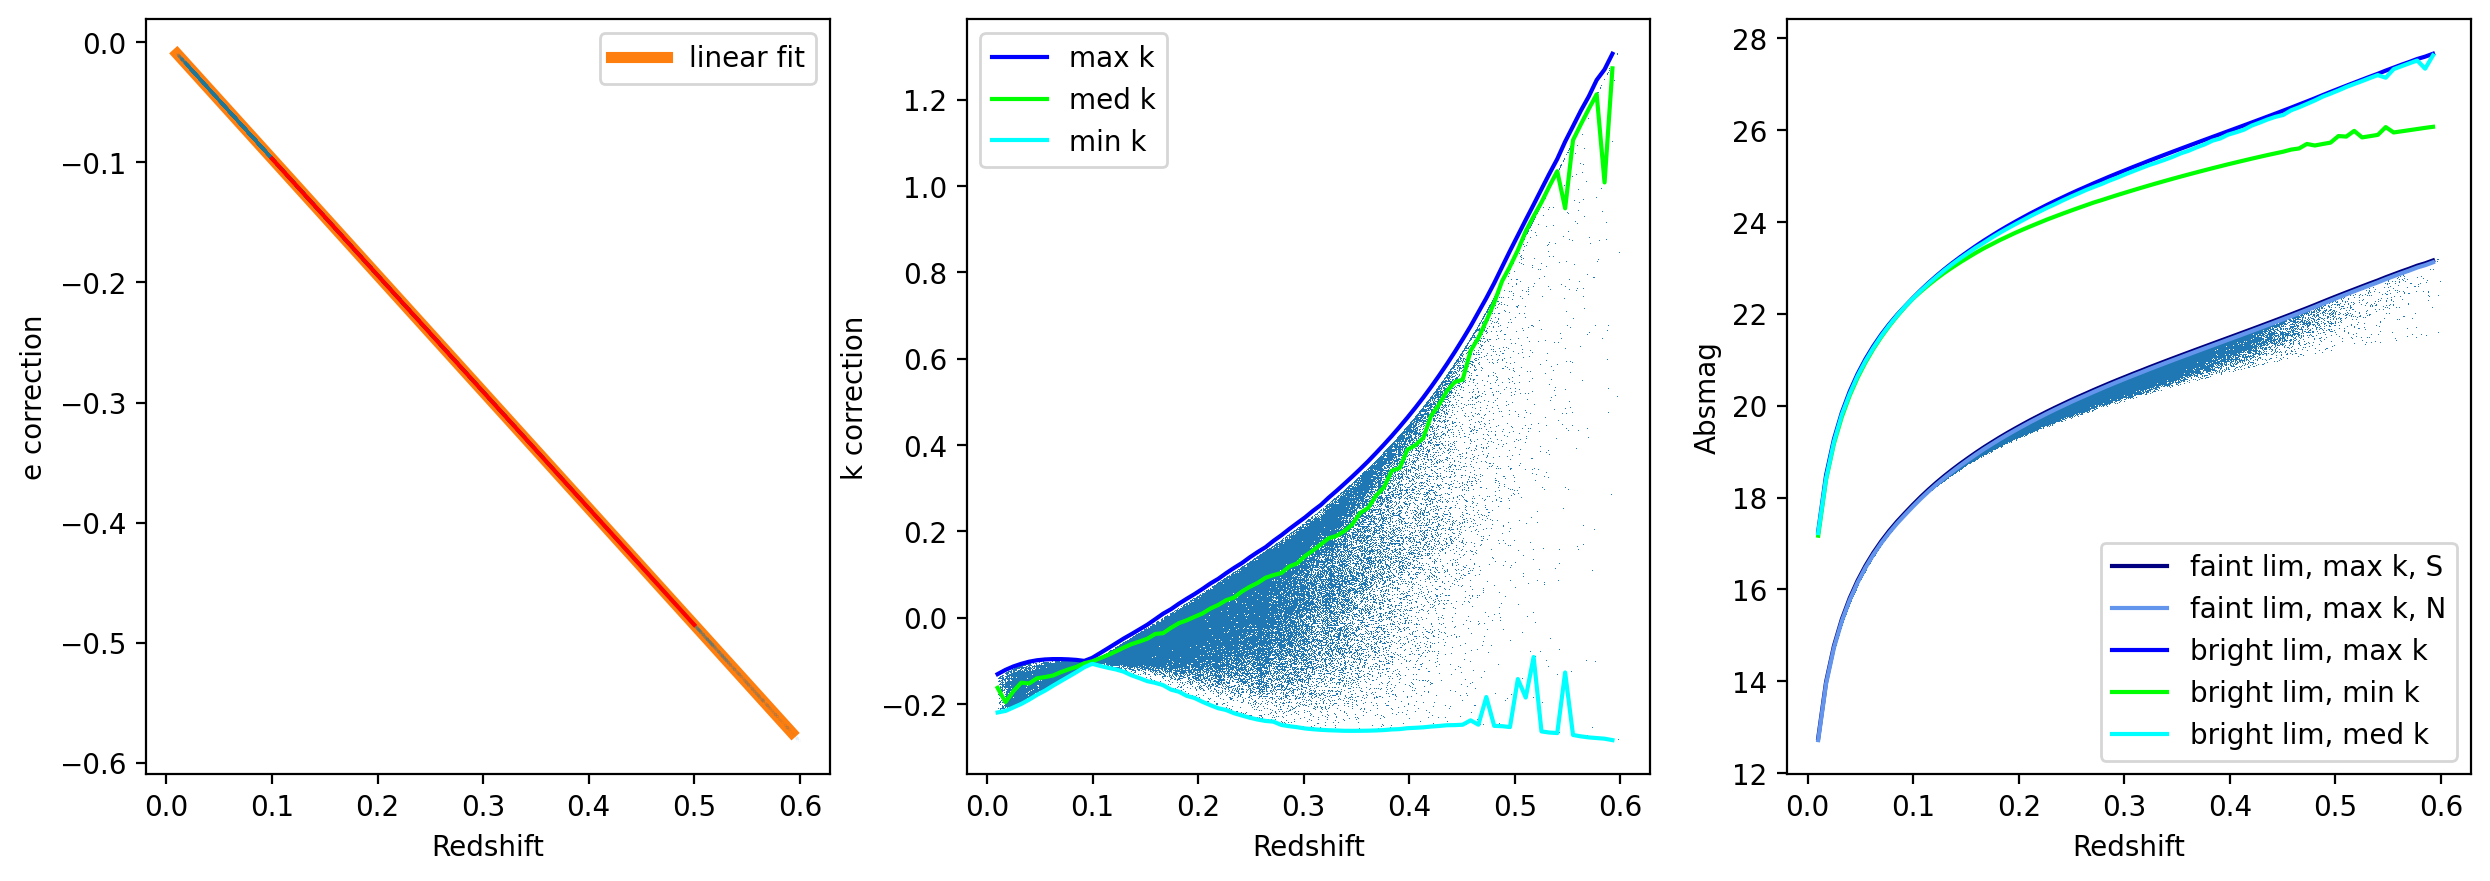

In [42]:
plt.figure(figsize=(15,5), dpi=200)

plt.subplot(131)
plt.plot(z_range[0:-1], e_z, label='linear fit', color='tab:orange', lw=4)
plt.plot(data['Z'], data['EQ_ALL_0P1'], lw=0, marker='o', color='tab:blue', markersize=0.01)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('e correction')

plt.subplot(132)
plt.plot(data['Z'], data['KCORR_R0P1'], lw=0, marker=',')
plt.plot(z_range[0:-1], k_max, color='blue', label='max k')
plt.plot(z_range[0:-1], k_med, color='lime', label='med k')
plt.plot(z_range[0:-1], k_min, color='aqua', label='min k')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('k correction')

plt.subplot(133)
plt.plot(data['Z'], -data['ABSMAG_LIM'], lw=0, marker=',')
plt.plot(z_range[0:-1], -faintlim_range_S_max, color='navy', label='faint lim, max k, S')
plt.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_med, color='palegreen', label='med k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_min, color='darkturquoise', label='min k, N')
plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
plt.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Absmag')
plt.savefig('../figures/week8/sv3_bright_corrections_and_absmag.png')


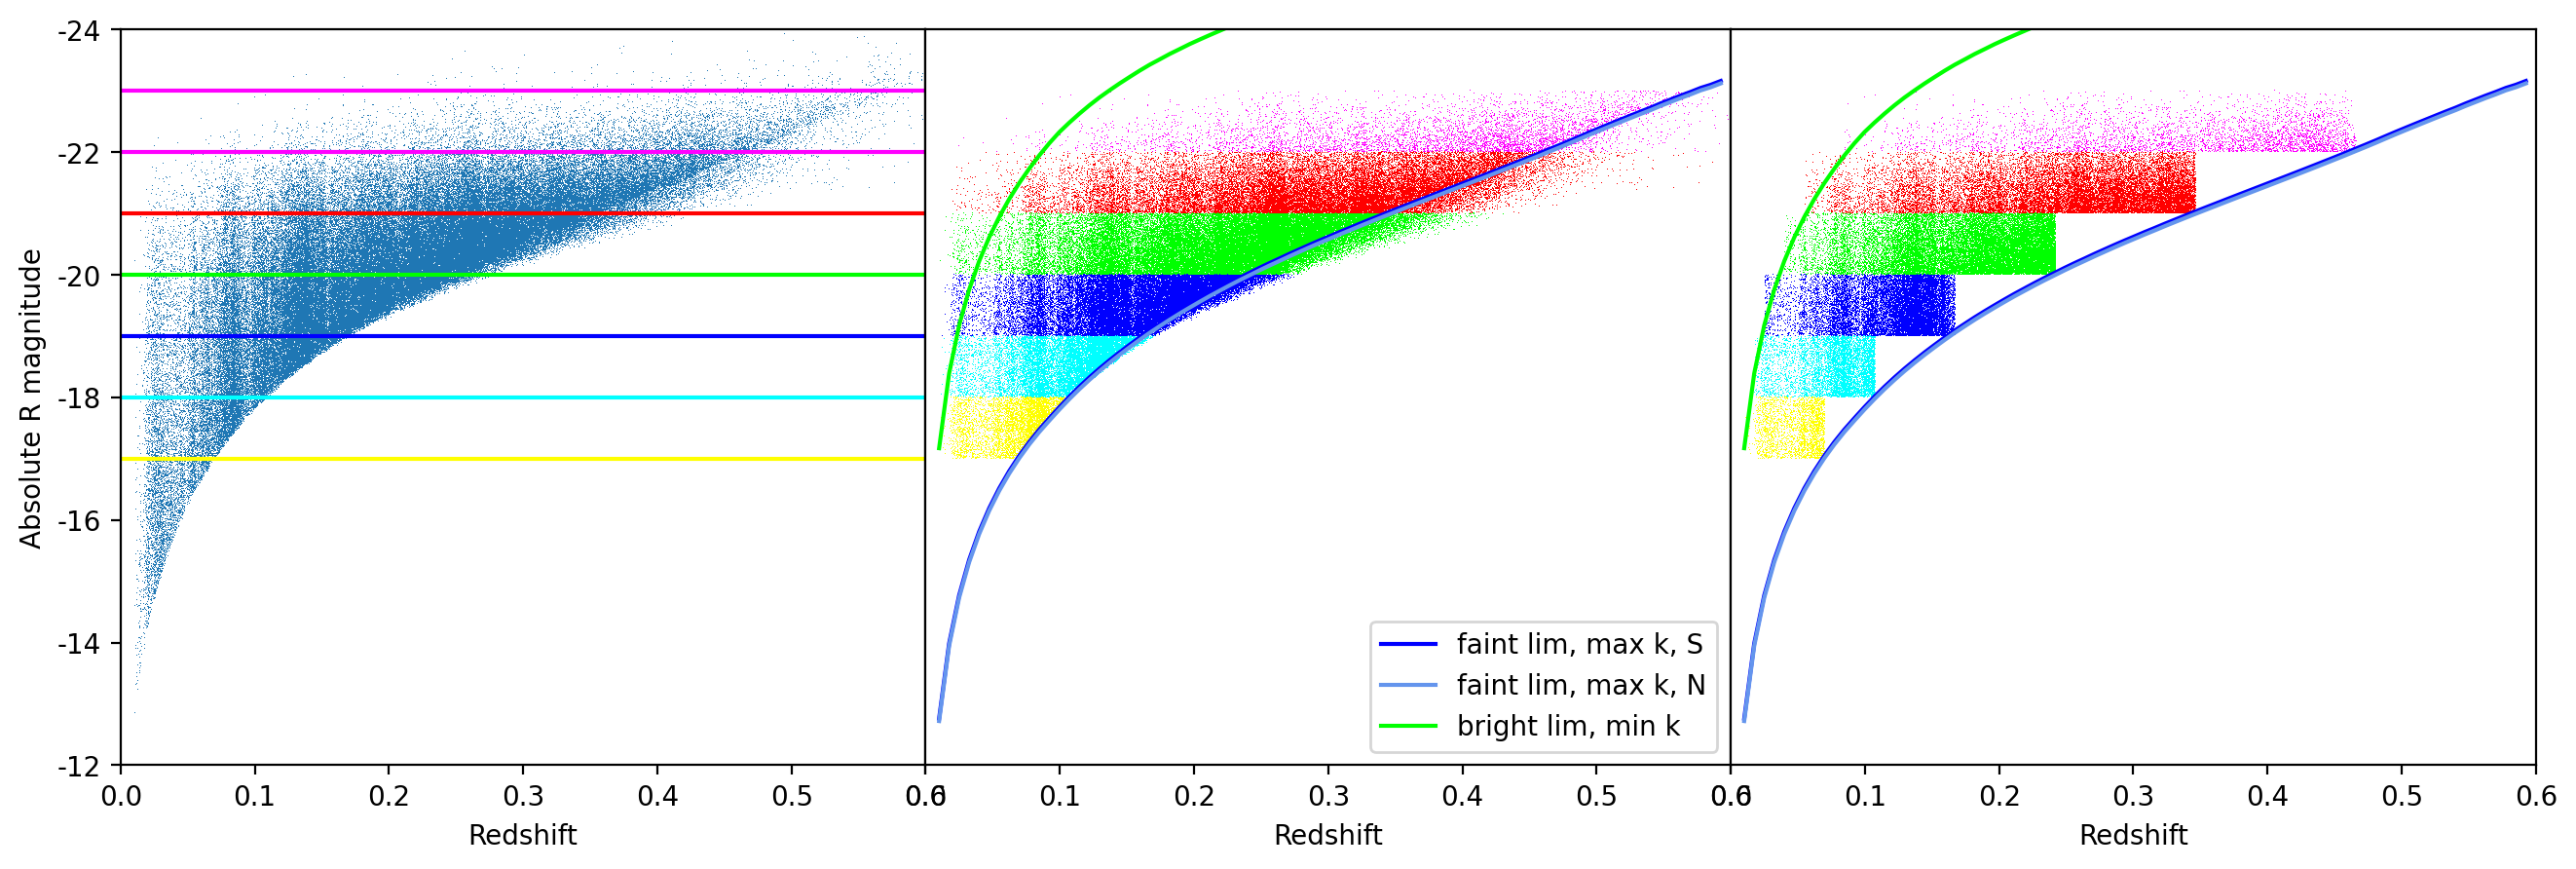

In [43]:
plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot(131)
ax1.plot(data['Z'], -data['ABSMAG_R'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax2 = plt.subplot(132)
ax2.plot(data['Z'][absmag_lim(-17,-18, data)], -data['ABSMAG_R'][absmag_lim(-17,-18, data)], lw=0, marker=',', color='yellow')
ax2.plot(data['Z'][absmag_lim(-18,-19, data)], -data['ABSMAG_R'][absmag_lim(-18,-19, data)], lw=0, marker=',', color='cyan')
ax2.plot(data['Z'][absmag_lim(-19,-20, data)], -data['ABSMAG_R'][absmag_lim(-19,-20, data)], lw=0, marker=',', color='blue')
ax2.plot(data['Z'][absmag_lim(-20,-21, data)], -data['ABSMAG_R'][absmag_lim(-20,-21, data)], lw=0, marker=',', color='lime')
ax2.plot(data['Z'][absmag_lim(-21,-22, data)], -data['ABSMAG_R'][absmag_lim(-21,-22, data)], lw=0, marker=',', color='red')
ax2.plot(data['Z'][absmag_lim(-22,-23, data)], -data['ABSMAG_R'][absmag_lim(-22,-23, data)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range, -M_range, color='tab:blue', lw=1, label='my estimate')
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')

#plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
#plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')



plt.legend()
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')

ax3 = plt.subplot(133)
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17, data))], lw=0, marker=',', color='yellow')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18, data))], lw=0, marker=',', color='cyan')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19, data))], lw=0, marker=',', color='blue')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20, data))], lw=0, marker=',', color='lime')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21, data))], lw=0, marker=',', color='red')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22, data))], lw=0, marker=',', color='magenta')
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8/sv3_bright_mag_v_redshift.png')


[21335 21336 21337 ... 61339 61340 61341] [     0      1      2 ... 143850 143851 143852]
[21335 21336 21337 ... 61339 61340 61341]


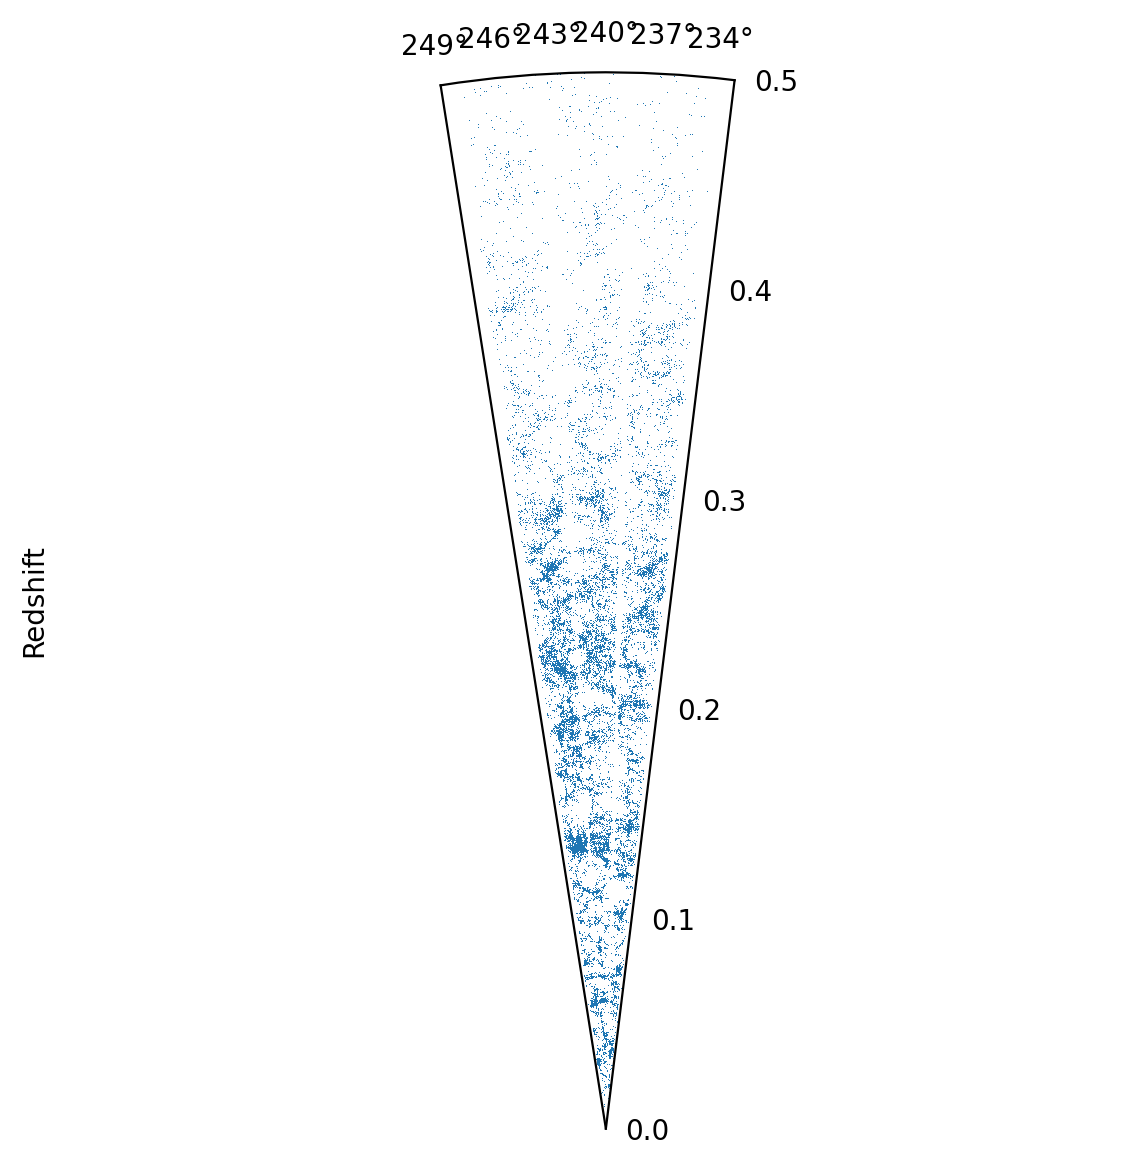

In [49]:
dec_slice = np.where(np.logical_and(data['DEC'] >= 40, data['DEC'] <= 50))[0]
redshift_cut = np.where(data['Z'] <= 0.5)[0]
print(dec_slice, redshift_cut)

cone_cut = np.intersect1d(dec_slice, redshift_cut)
print(cone_cut)

RA_rad = np.deg2rad(data['RA'])

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': 'polar'}, dpi=200)
plt.grid(False)
ax.plot(RA_rad[cone_cut],data['Z'][cone_cut], lw=0, marker=',', color='tab:blue')
ax.set_theta_offset(np.deg2rad(210))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(233),np.deg2rad(249))
plt.ylabel('Redshift')
plt.savefig('../figures/week8/sv3_bright_cone_plot.png')

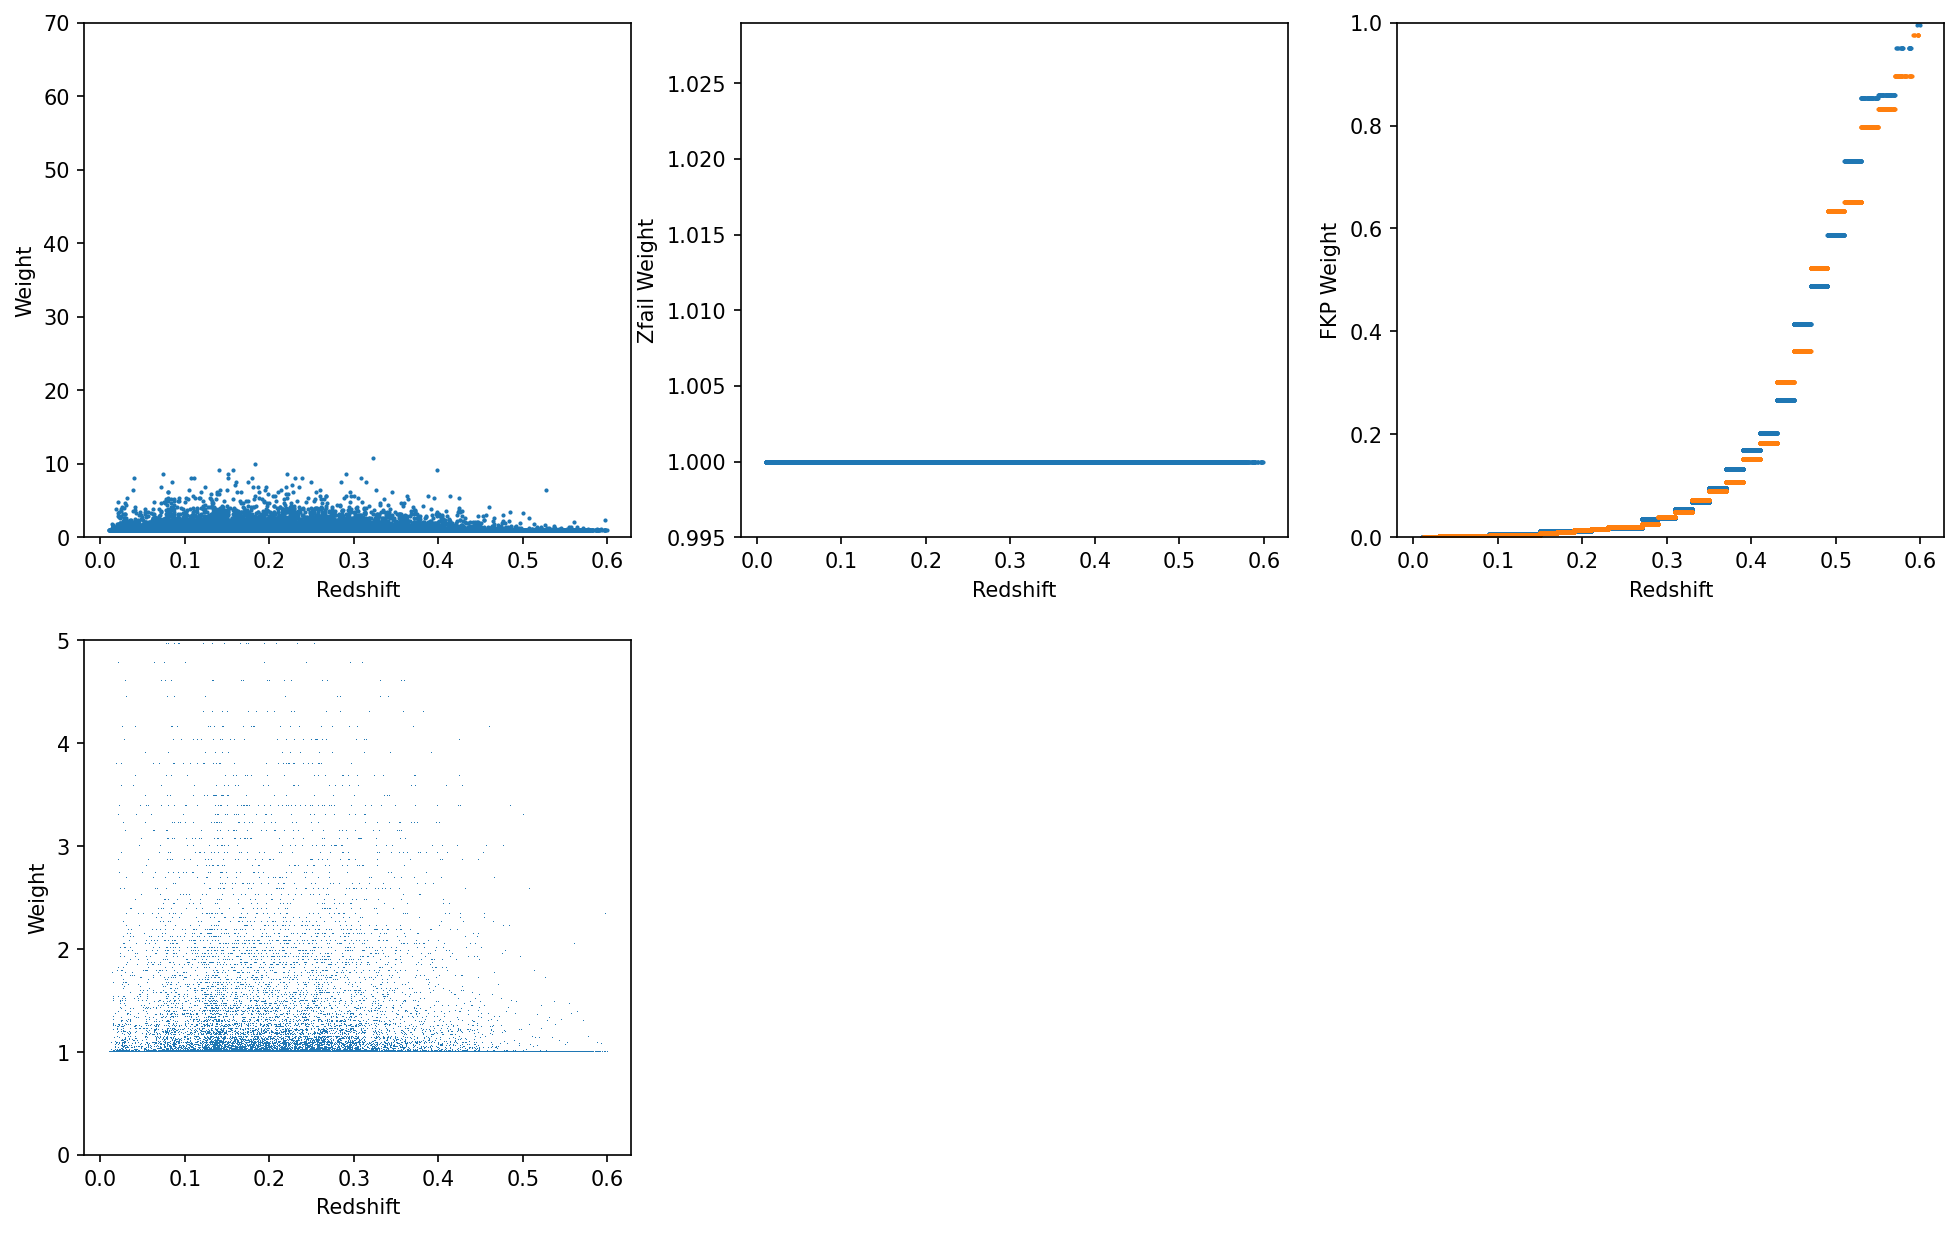

In [46]:
plt.figure(figsize=(16,10),dpi=150)
ax1 = plt.subplot(231)
ax1.plot(data['Z'], data['WEIGHT'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,70)

ax4 = plt.subplot(234)
ax4.plot(data['Z'], data['WEIGHT'], lw=0, marker=',')
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,5)

ax2 = plt.subplot(232)
ax2.plot(data['Z'], data['WEIGHT_ZFAIL'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Zfail Weight')
plt.ylim(0.995,1.029)

ax3 = plt.subplot(233)
ax3.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
ax3.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('FKP Weight')
plt.ylim(0,1)

plt.savefig('../figures/week8/sv3_bright_weights.png')

#https://desi.lbl.gov/trac/wiki/ClusteringWG/LSScat/SV3/current_version
#WEIGHT = 129/(128*PROB_OBS + 1)
#There is one object which has zero probobs

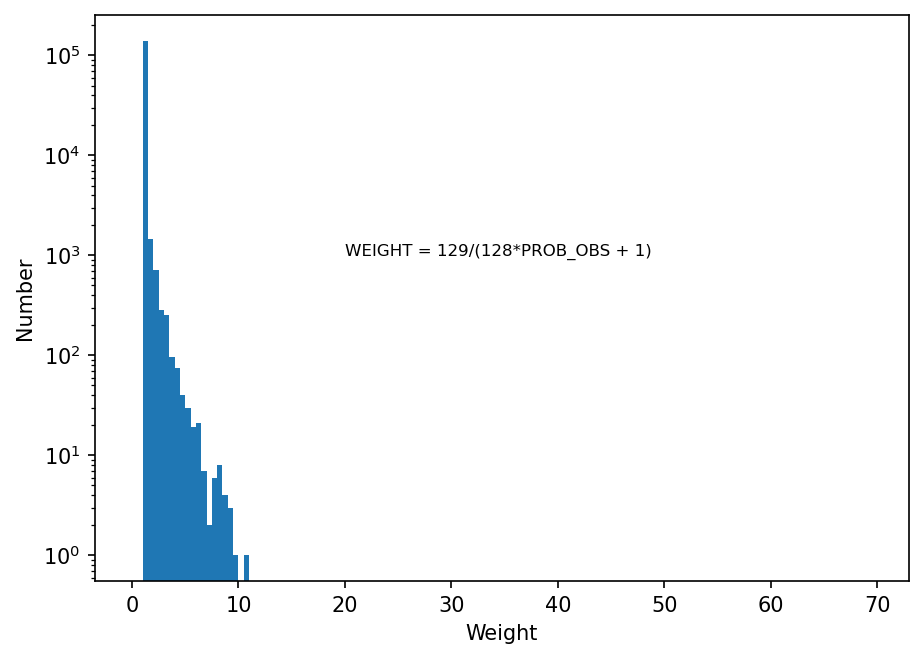

In [47]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.hist(data['WEIGHT'], np.arange(0,70,0.5))
ax.set_yscale('log')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.text(20,1000,'WEIGHT = 129/(128*PROB_OBS + 1)', size=8)
plt.savefig('../figures/week8/sv3_bright_weight_hist.png')